In [ ]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# EDA and data pre-processing

In [2]:
# Load the data
ethereum = pd.read_excel("G:/Min disk/Data_science/machinelearninganddeeplearning/Assignment_02/ethereum.xlsx", sheet_name='Data', header=[4], usecols='B:C')

ethereum.columns = ['date', 'price_usd']

ethereum['date'] = pd.to_datetime(ethereum['date'], format='%b %d, %Y')

In [3]:
# ethereum.info()
ethereum.describe()

,date,price_usd
count,1000,1000.000000
mean,2023-10-19 12:00:00,2241.945930
min,2022-06-07 00:00:00,993.640000
25%,2023-02-11 18:00:00,1629.570000
50%,2023-10-19 12:00:00,1924.125000
75%,2024-06-25 06:00:00,2910.242500
max,2025-03-02 00:00:00,4066.450000
std,NaN,790.959065


<Axes: xlabel='date'>

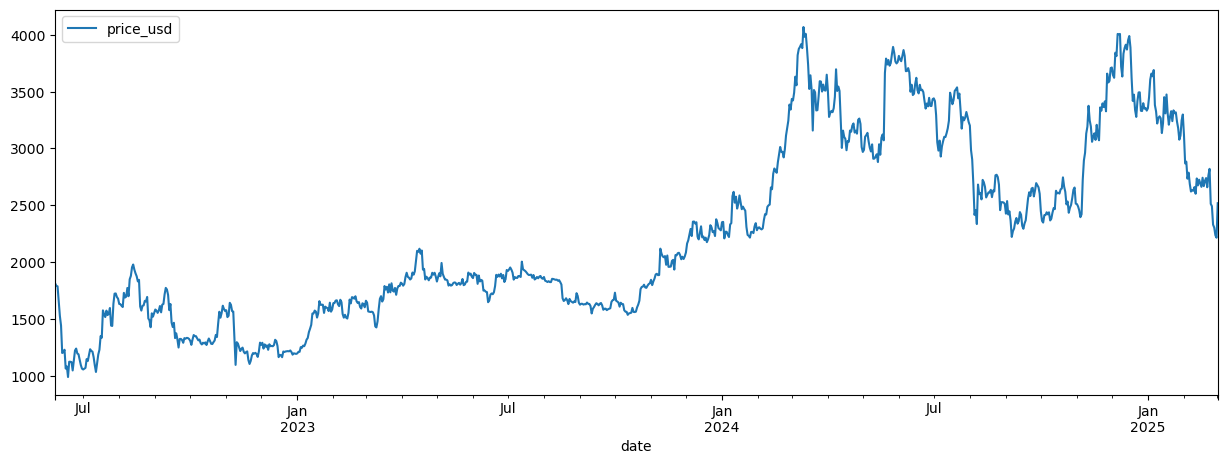

In [4]:
# plot price and date
ethereum.plot(x='date', y='price_usd', figsize=(15, 5))

In [5]:
# Load the data
spx = pd.read_csv("G:/Min disk/Data_science/machinelearninganddeeplearning/Assignment_02/spx.csv")

In [6]:
spx.head()

,Date,Close/Last,Open,High,Low
0,02/28/2025,5954.50,5856.74,5959.40,5837.66
1,02/27/2025,5861.57,5981.88,5993.69,5858.78
2,02/26/2025,5956.06,5970.87,6009.82,5932.69
3,02/25/2025,5955.25,5982.73,5992.65,5908.49
4,02/24/2025,5983.25,6026.69,6043.65,5977.83


In [ ]:
# Column cleaner function for standardizing column names
import re
def column_name_cleaner(df):
    df.columns = [
        re.sub(r'_+', '_',  # Remove multiple consecutive underscores
        re.sub(r'[^a-zA-Z0-9]', '_',  # Replace non-alphanumeric with underscores
        re.sub(r'(?<=[a-z])(?=[A-Z])', '_', column_name.strip().lower())))  # Split camelCase
        for column_name in df.columns
    ]
    return df

column_name_cleaner(spx)

,date,close_last,open,high,low
0,02/28/2025,5954.50,5856.74,5959.40,5837.66
1,02/27/2025,5861.57,5981.88,5993.69,5858.78
2,02/26/2025,5956.06,5970.87,6009.82,5932.69
3,02/25/2025,5955.25,5982.73,5992.65,5908.49
4,02/24/2025,5983.25,6026.69,6043.65,5977.83
...,...,...,...,...,...
1251,03/09/2020,2746.56,2863.89,2863.89,2734.43
1252,03/06/2020,2972.37,2954.20,2985.93,2901.54
1253,03/05/2020,3023.94,3075.70,3083.04,2999.83
1254,03/04/2020,3130.12,3045.75,3130.97,3034.38


In [8]:
spx['date'] = pd.to_datetime(spx['date'])

In [9]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1256 non-null   datetime64[ns]
 1   close_last  1256 non-null   float64       
 2   open        1256 non-null   float64       
 3   high        1256 non-null   float64       
 4   low         1256 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.2 KB


In [10]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1000 non-null   datetime64[ns]
 1   price_usd  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


<Axes: xlabel='date'>

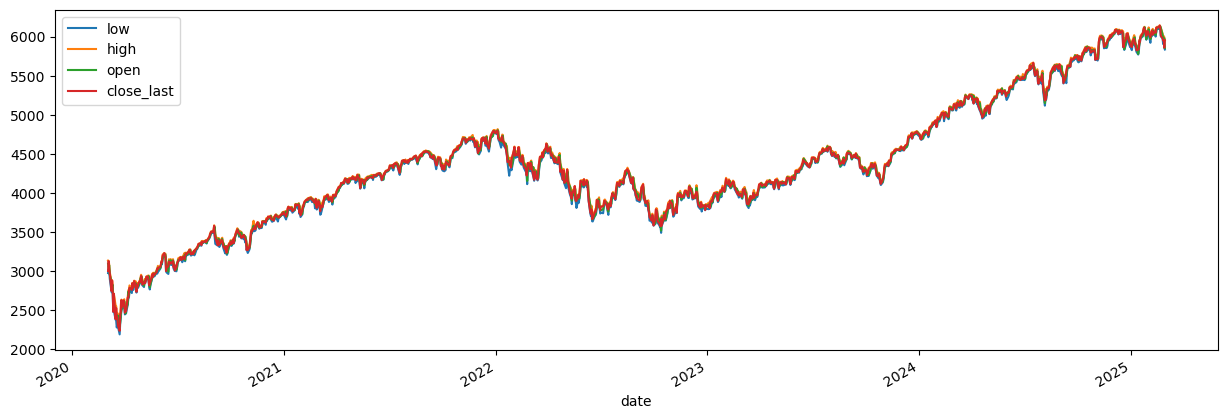

In [11]:
spx.plot(x='date', y=['low', 'high', 'open', 'close_last'], figsize=(15,5))

In [12]:
daterange = pd.date_range(start='2022-06-07', end='2025-02-28')

spx = spx[spx['date'].isin(daterange)]
ethereum = ethereum[ethereum['date'].isin(daterange)]

# sort spx by date from lowest to highest
spx.sort_values(by=['date'], ascending=True, inplace=True)

C:\Users\mikae\AppData\Local\Temp\ipykernel_27324\2511749851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx.sort_values(by=['date'], ascending=True, inplace=True)


In [13]:
'''
Handle misalignment in the amount of values in each dataframe
'''

# Check missing timestamps in ethereum compared to stock
missing_in_stock = spx.index.difference(spx.index)
missing_in_ethereum = ethereum.index.difference(ethereum.index)

print(f"Timestamps in stock but not in ethereum: {len(missing_in_ethereum)}")
print(f"Timestamps in ethereum but not in stock: {len(missing_in_stock)}")

# Inspect missing timestamps
print("Sample missing timestamps in ethereum:", missing_in_ethereum[:5])
print("Sample missing timestamps in stock:", missing_in_stock[:5])

# Check for duplicate timestamps
print(f"Duplicate timestamps in stock: {spx.index.duplicated().sum()}")
print(f"Duplicate timestamps in ethereum: {ethereum.index.duplicated().sum()}")


Timestamps in stock but not in ethereum: 0
Timestamps in ethereum but not in stock: 0
Sample missing timestamps in ethereum: Index([], dtype='int64')
Sample missing timestamps in stock: Index([], dtype='int64')
Duplicate timestamps in stock: 0
Duplicate timestamps in ethereum: 0


In [14]:
# Create a full date range based on crypto
full_dates = ethereum["date"]
# Create a DataFrame with all dates
spx_full = pd.DataFrame({"date": full_dates})

# Merge with stock data to fill in missing dates
spx = spx_full.merge(spx, on="date", how="left")

# Fill missing stock prices (since stocks don't trade on weekends)
spx.ffill(inplace=True)

#Drop missing values
spx.dropna(inplace=True)
ethereum.dropna(inplace=True)

print(spx_full.head(10))
print(spx_full.tail(10))
print(spx_full.isnull().sum())

        date
0 2022-06-07
1 2022-06-08
2 2022-06-09
3 2022-06-10
4 2022-06-11
5 2022-06-12
6 2022-06-13
7 2022-06-14
8 2022-06-15
9 2022-06-16
          date
988 2025-02-19
989 2025-02-20
990 2025-02-21
991 2025-02-22
992 2025-02-23
993 2025-02-24
994 2025-02-25
995 2025-02-26
996 2025-02-27
997 2025-02-28
date    0
dtype: int64


C:\Users\mikae\AppData\Local\Temp\ipykernel_27324\2615300068.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ethereum.dropna(inplace=True)


In [15]:
# Export both files to csv
spx.to_csv("G:/Min disk/Data_science/machinelearninganddeeplearning/Assignment_02/spx_cleaned.csv", index=False)
ethereum.to_csv("G:/Min disk/Data_science/machinelearninganddeeplearning/Assignment_02/ethereum_cleaned.csv", index=False)

## EDA

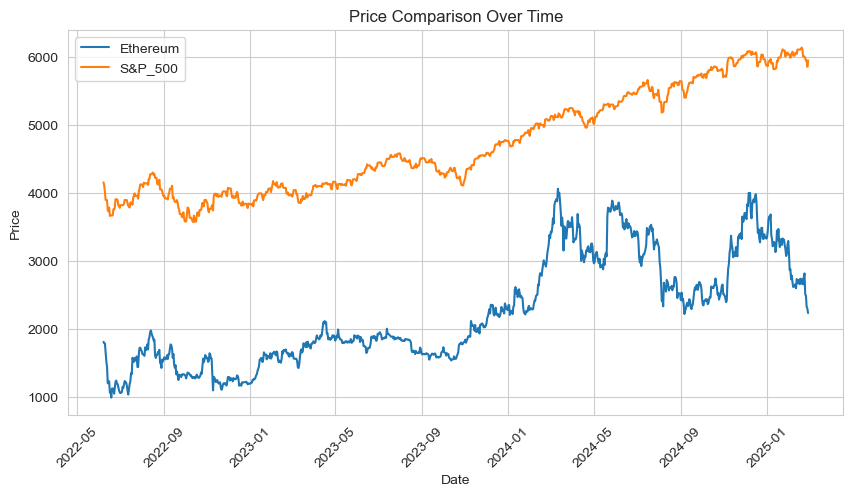

In [16]:
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=ethereum, x="date", y="price_usd", label="Ethereum")
sns.lineplot(data=spx, x="date", y="close_last", label="S&P_500")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Comparison Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [17]:
# Change in pct and Cumulative change function
def calculate_cumulative_change(df, price_column):
    df['change_pct'] = df[price_column].pct_change()
    df['cumulative_change'] = (1 + df['change_pct']).cumprod() - 1  # Cumulative return
    return df

# Apply function to both datasets
ethereum = calculate_cumulative_change(ethereum, 'price_usd')
spx = calculate_cumulative_change(spx, 'open')

C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\629669183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_pct'] = df[price_column].pct_change()
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\629669183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_change'] = (1 + df['change_pct']).cumprod() - 1  # Cumulative return


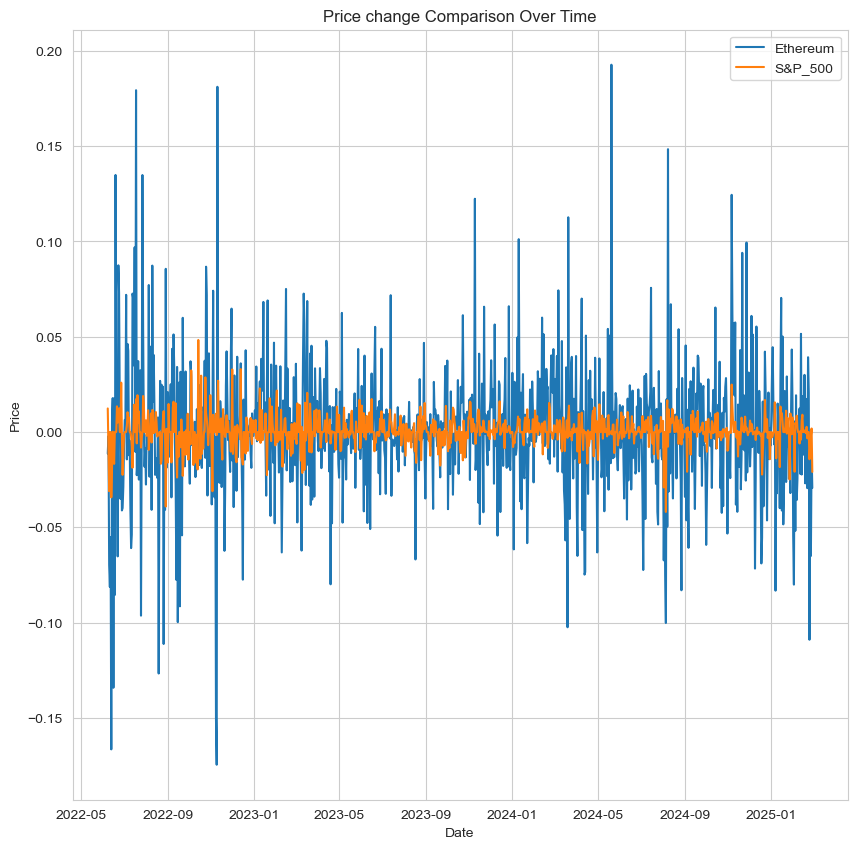

In [18]:
# Plot
plt.figure(figsize=(10, 10))
sns.lineplot(data=ethereum, x="date", y="change_pct", label="Ethereum")
sns.lineplot(data=spx, x="date", y="change_pct", label="S&P_500")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price change Comparison Over Time")
plt.legend()
plt.show()

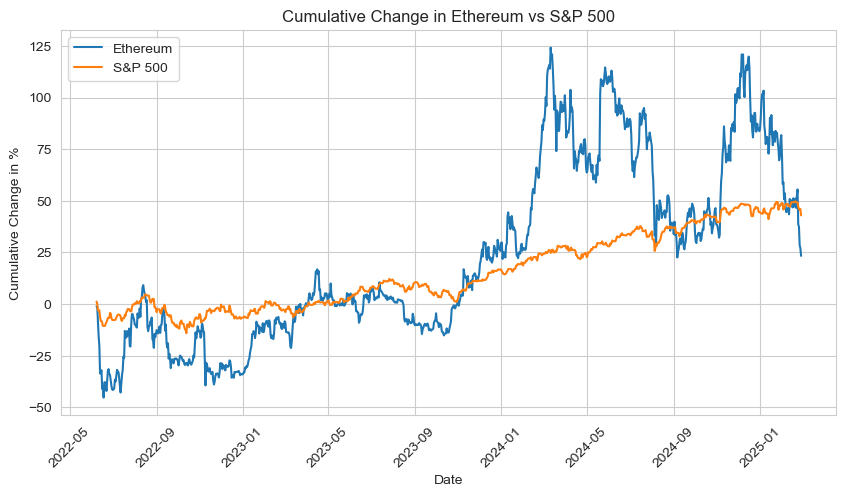

In [19]:

# Plot cumulative change
plt.figure(figsize=(10, 5))
plt.plot(ethereum['date'], (ethereum['cumulative_change']*100), label="Ethereum")
plt.plot(spx['date'], (spx['cumulative_change']*100), label="S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Change in %")
plt.title("Cumulative Change in Ethereum vs S&P 500")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [20]:
spx['price_usd'] = spx['close_last']
spx.drop(columns=['close_last', 'open', 'high', 'low'], inplace=True)

In [21]:
'''
This function calculates the percentage return of a stock based on the purchase date and sell date.
'''
def calculate_roi_pct(df, purchase_date, sell_date, price_column='price_usd'):
    range = df[(df['date'] >= purchase_date) & (df['date'] <= sell_date)]
    purchase_price = range[price_column].iloc[0]
    sell_price = range[price_column].iloc[-1]
    roi_pct = (sell_price - purchase_price) / purchase_price
    return roi_pct

In [165]:
print(calculate_roi_pct(ethereum, ethereum['date'].iloc[0], ethereum['date'].iloc[-1]))
print(calculate_roi_pct(spx, spx['date'].iloc[0], spx['date'].iloc[-1]))

0.23365397866651963
0.4311362565734446


In [22]:
'''
This function is based on the calculate_roi_pct function. It calculates the ROI based on the amount invested.
'''
def calculate_roi (df, purchase_date, sell_date, investment):
    roi_pct = calculate_roi_pct(df, purchase_date, sell_date)
    investment = investment

    roi = investment*roi_pct
    return roi

        # print(f'{round((roi_pct*100), 3)}% return (${round(roi,2)})')

In [23]:
# Convert DKK to USD according to given exchange rates
exchange_rates = {'DKK': 7.10,'USD': 1}
saved_dkk = 500000
saved_usd = saved_dkk/exchange_rates['DKK']
print(f"Saved USD: ${saved_usd}")

calculate_roi(ethereum, ethereum['date'].iloc[0], ethereum['date'].iloc[-1], saved_usd)

Saved USD: $70422.5352112676


16454.50553989575

In [25]:
def calculate_roi_over_time(df, investment, freq='M'):
    df['date'] = pd.to_datetime(df['date'])  # Ensure it's datetime

    if freq == 'M':
        df['period'] = df['date'].dt.to_period('M')  # Convert to monthly periods
    elif freq == 'Y':
        df['period'] = df['date'].dt.to_period('Y')  # Convert to yearly periods

    rois = []
    periods = df['period'].unique()

    for i in range(len(periods) - 1):  # Loop through each period
        purchase_date = df[df['period'] == periods[i]]['date'].min()
        sell_date = df[df['period'] == periods[i + 1]]['date'].min()

        try:
            roi = calculate_roi(df, purchase_date, sell_date, investment)
            rois.append({'date': sell_date, 'roi': roi})
        except IndexError:
            continue  # Skip if no data for that period

    return pd.DataFrame(rois)


# Calculate for monthly and yearly periods
investment = saved_usd

# Calculate Monthly and Yearly ROI Without Changing Index
roi_spx_monthly = calculate_roi_over_time(spx, investment, 'M')
roi_spx_yearly = calculate_roi_over_time(spx, investment, 'Y')
roi_eth_monthly = calculate_roi_over_time(ethereum, investment, 'M')
roi_eth_yearly = calculate_roi_over_time(ethereum, investment, 'Y')

print(f"Average Monthly ROI for SPX: {roi_spx_monthly['roi'].mean():.2f} USD")
print(f"Average Yearly ROI for SPX: {roi_spx_yearly['roi'].mean():.2f} USD")
print(f"Average Monthly ROI for Ethereum: {roi_eth_monthly['roi'].mean():.2f} USD")
print(f"Average Yearly ROI for Ethereum: {roi_eth_yearly['roi'].mean():.2f} USD")



C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\539475004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])  # Ensure it's datetime
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\539475004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = df['date'].dt.to_period('M')  # Convert to monthly periods


Average Monthly ROI for SPX: 901.88 USD
Average Yearly ROI for SPX: 9347.44 USD
Average Monthly ROI for Ethereum: 2632.51 USD
Average Yearly ROI for Ethereum: 24562.17 USD


C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\539475004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])  # Ensure it's datetime
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\539475004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = df['date'].dt.to_period('Y')  # Convert to yearly periods


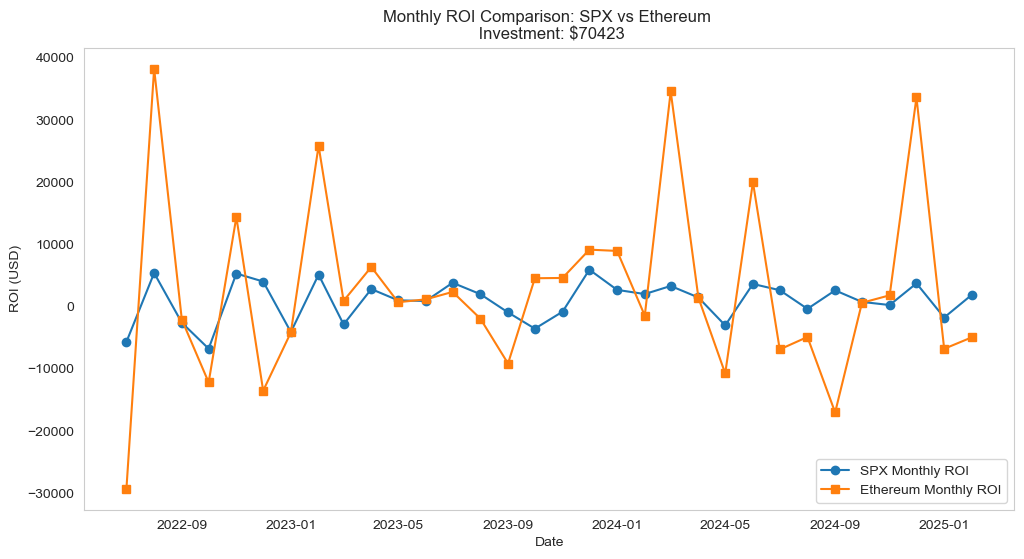

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(roi_spx_monthly['date'], roi_spx_monthly['roi'], label='SPX Monthly ROI', marker='o')
plt.plot(roi_eth_monthly['date'], roi_eth_monthly['roi'], label='Ethereum Monthly ROI', marker='s')
plt.xlabel('Date')
plt.ylabel('ROI (USD)')
plt.title(f'Monthly ROI Comparison: SPX vs Ethereum \n Investment: ${round(investment)}')
plt.legend()
plt.grid()
plt.show()


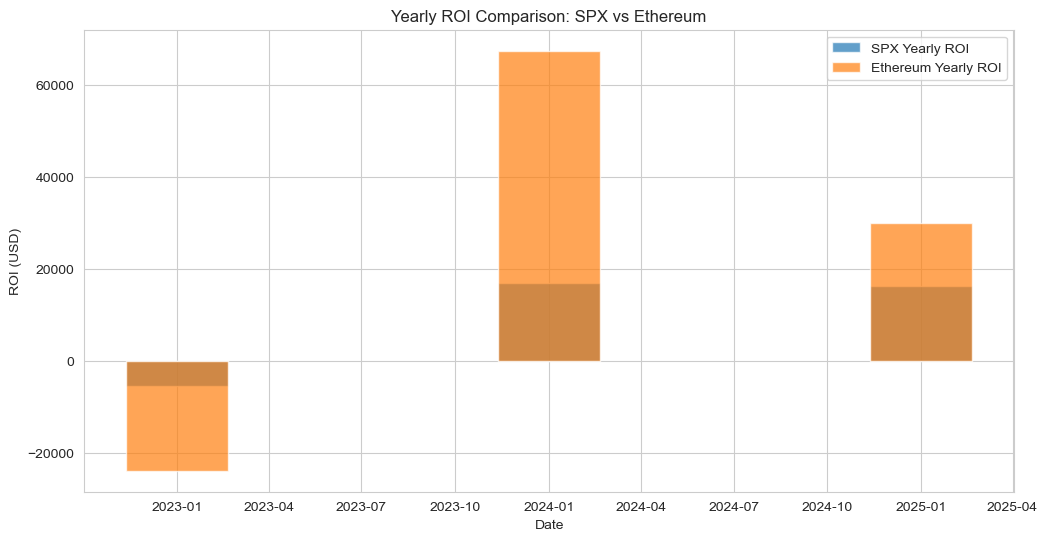

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(roi_spx_yearly['date'], roi_spx_yearly['roi'], width=100, label='SPX Yearly ROI', alpha=0.7)
plt.bar(roi_eth_yearly['date'], roi_eth_yearly['roi'], width=100, label='Ethereum Yearly ROI', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('ROI (USD)')
plt.title('Yearly ROI Comparison: SPX vs Ethereum')
plt.legend()
plt.show()



In [49]:
spx_std = roi_spx_monthly['roi'].std()
eth_std = roi_eth_monthly['roi'].std()

sharpe_ratio_spx = roi_spx_monthly['roi'].mean() / spx_std
sharpe_ratio_eth = roi_eth_monthly['roi'].mean() / eth_std

print(f"Sharpe Ratio for SPX: {sharpe_ratio_spx:.2f}")
print(f"Sharpe Ratio for Ethereum: {sharpe_ratio_eth:.2f}")
print(f"Sharpe Ratio for SPX vs Ethereum: {sharpe_ratio_spx - sharpe_ratio_eth:.2f}")

print(spx_std)
print(eth_std)


Sharpe Ratio for SPX: 0.27
Sharpe Ratio for Ethereum: 0.18
Sharpe Ratio for SPX vs Ethereum: 0.10
3327.603544814067
14972.560532943371


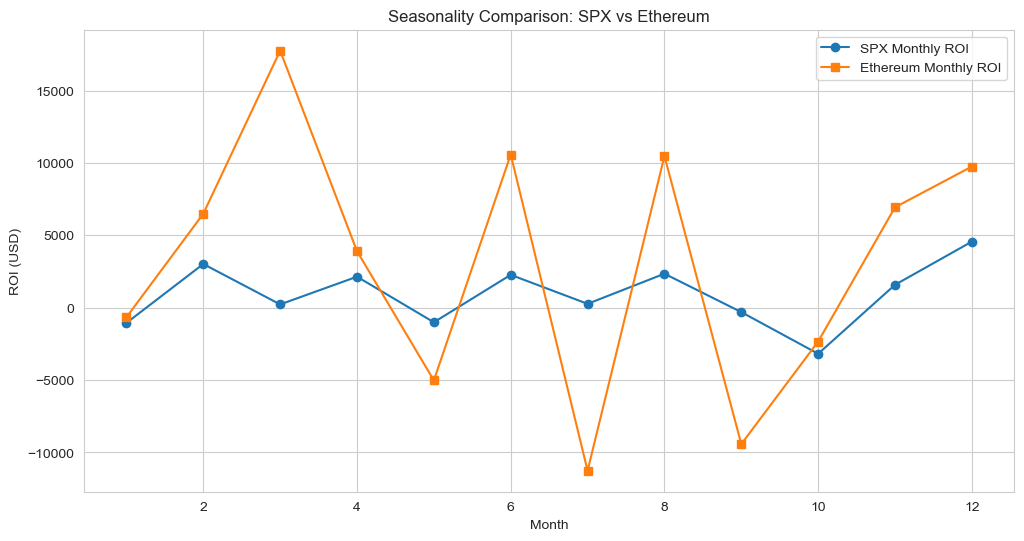

In [53]:
roi_spx_monthly['month'] = roi_spx_monthly['date'].dt.month
roi_eth_monthly['month'] = roi_eth_monthly['date'].dt.month

seasonality_spx = roi_spx_monthly.groupby('month')['roi'].mean()
seasonality_eth = roi_eth_monthly.groupby('month')['roi'].mean()

plt.figure(figsize=(12, 6))
plt.plot(seasonality_spx.index, seasonality_spx, label='SPX Monthly ROI', marker='o')
plt.plot(seasonality_eth.index, seasonality_eth, label='Ethereum Monthly ROI', marker='s')
plt.xlabel('Month')
plt.ylabel('ROI (USD)')
plt.title('Seasonality Comparison: SPX vs Ethereum')
plt.legend()
plt.show()


In [73]:
import numpy as np

def calculate_portfolio_metrics(roi_spx, roi_eth, std_spx, std_eth):
    allocations = [(1, 0),(0.1, 0.9),(0.3, 0.7),(0.5, 0.5),(0.7, 0.3),(0.9, 0.1), (0, 1)]

    results = []

    for w_spx, w_eth in allocations:
        portfolio_return = w_spx * roi_spx['roi'].mean() + w_eth * roi_eth['roi'].mean()
        portfolio_std = np.sqrt((w_spx**2 * std_spx**2) + (w_eth**2 * std_eth**2))
        sharpe_ratio = portfolio_return / portfolio_std if portfolio_std != 0 else np.nan  # Avoid division by zero

        results.append({
            'SPX Weight': w_spx,
            'Ethereum Weight': w_eth,
            'Portfolio Return': portfolio_return,
            'Portfolio Std Dev': portfolio_std,
            'Sharpe Ratio': sharpe_ratio
        })

    return results

portfolio_results = calculate_portfolio_metrics(roi_spx_monthly, roi_eth_monthly, spx_std, eth_std)

# Print results
for res in portfolio_results:
    print(f"SPX {res['SPX Weight']*100:.0f}% / ETH {res['Ethereum Weight']*100:.0f}% --> "
          f"Return: {res['Portfolio Return']:.2f}, Std Dev: {res['Portfolio Std Dev']:.2f}, "
          f"Sharpe Ratio: {res['Sharpe Ratio']:.2f}")


SPX 100% / ETH 0% --> Return: 901.88, Std Dev: 3327.60, Sharpe Ratio: 0.27
SPX 10% / ETH 90% --> Return: 2459.45, Std Dev: 13479.41, Sharpe Ratio: 0.18
SPX 30% / ETH 70% --> Return: 2113.32, Std Dev: 10528.23, Sharpe Ratio: 0.20
SPX 50% / ETH 50% --> Return: 1767.20, Std Dev: 7668.94, Sharpe Ratio: 0.23
SPX 70% / ETH 30% --> Return: 1421.07, Std Dev: 5059.81, Sharpe Ratio: 0.28
SPX 90% / ETH 10% --> Return: 1074.95, Std Dev: 3348.26, Sharpe Ratio: 0.32
SPX 0% / ETH 100% --> Return: 2632.51, Std Dev: 14972.56, Sharpe Ratio: 0.18


# Feature engineering - not methods from curriculum

In [28]:
def add_moving_averages(df, price_col = 'price_usd'):

    df["SMA_20"] = df[price_col].rolling(window=20).mean()  # 20-day Simple Moving Average
    df["SMA_50"] = df[price_col].rolling(window=50).mean()

    df["EMA_20"] = df[price_col].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average
    df["EMA_50"] = df[price_col].ewm(span=50, adjust=False).mean()
    return df

spx = add_moving_averages(spx)
ethereum = add_moving_averages(ethereum)


C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\1141586018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SMA_20"] = df[price_col].rolling(window=20).mean()  # 20-day Simple Moving Average
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\1141586018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SMA_50"] = df[price_col].rolling(window=50).mean()
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\1141586018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [29]:
def add_volatility_indicators(df, price_col = 'price_usd'):
    df["ATR_14"] = df[price_col].rolling(window=14).std()  # Approximation of ATR using rolling std

    # Bollinger Bands (20-day SMA +/- 2 std deviations)
    df["BB_Mid"] = df["SMA_20"]
    df["BB_Upper"] = df["BB_Mid"] + 2 * df[price_col].rolling(window=20).std()
    df["BB_Lower"] = df["BB_Mid"] - 2 * df[price_col].rolling(window=20).std()
    return df

spx = add_volatility_indicators(spx)
ethereum = add_volatility_indicators(ethereum)


C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3005811737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ATR_14"] = df[price_col].rolling(window=14).std()  # Approximation of ATR using rolling std
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3005811737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BB_Mid"] = df["SMA_20"]
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3005811737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [30]:
def add_momentum_indicators(df, price_col="price_usd"):
    # RSI (Relative Strength Index)
    delta = df[price_col].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=14).mean()
    avg_loss = pd.Series(loss).rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df["RSI_14"] = 100 - (100 / (1 + rs))

    # MACD (Moving Average Convergence Divergence)
    df["MACD"] = df[price_col].ewm(span=12, adjust=False).mean() - df[price_col].ewm(span=26, adjust=False).mean()
    df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
    return df

spx = add_momentum_indicators(spx)
ethereum = add_momentum_indicators(ethereum)


C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3100029755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RSI_14"] = 100 - (100 / (1 + rs))
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3100029755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MACD"] = df[price_col].ewm(span=12, adjust=False).mean() - df[price_col].ewm(span=26, adjust=False).mean()
C:\Users\mikae\AppData\Local\Temp\ipykernel_16588\3100029755.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [31]:
# Merge both datasets on 'date'
merged_df = pd.merge(spx[["date", "price_usd"]], ethereum[["date", "price_usd"]], on="date", suffixes=("_spx", "_eth"))

# Compute rolling correlation (30-day window)
merged_df["Correlation_30"] = merged_df["price_usd_spx"].rolling(window=30).corr(merged_df["price_usd_eth"])

print(merged_df[["date", "Correlation_30"]].tail())  # Check latest correlation values


          date  Correlation_30
993 2025-02-24       -0.092224
994 2025-02-25       -0.041314
995 2025-02-26        0.155743
996 2025-02-27        0.321587
997 2025-02-28        0.412367


In [32]:
spx.describe()

,date,change_pct,cumulative_change,price_usd,SMA_20,SMA_50,EMA_20,EMA_50,ATR_14,BB_Mid,BB_Upper,BB_Lower,RSI_14,MACD,MACD_Signal
count,998,997.000000,997.000000,998.000000,979.000000,949.000000,998.000000,998.000000,985.000000,979.000000,979.000000,979.000000,985.000000,998.000000,998.000000
mean,2023-10-18 12:00:00,0.000390,0.153713,4727.230371,4722.994794,4716.077783,4709.566671,4681.602523,51.802749,4722.994794,4845.233181,4600.756407,56.834133,13.214462,13.240479
min,2022-06-07 00:00:00,-0.041939,-0.140633,3577.030000,3643.859000,3721.545400,3657.863509,3762.607831,11.349981,3643.859000,3780.393267,3496.998092,7.452395,-128.740604,-107.005674
25%,2023-02-11 06:00:00,-0.001745,-0.004658,4079.090000,4070.300000,4047.178000,4051.714142,4029.512992,34.016905,4070.300000,4185.136330,3925.266647,43.469367,-12.563245,-12.146931
50%,2023-10-18 12:00:00,0.000000,0.100670,4505.260000,4480.789000,4477.052400,4468.478883,4446.838090,47.738329,4480.789000,4600.390499,4376.763339,58.576856,23.675257,23.389422
75%,2024-06-23 18:00:00,0.003798,0.320437,5406.120000,5393.217000,5392.908200,5384.451709,5335.718937,64.847004,5393.217000,5529.165911,5231.737700,70.440024,41.715186,40.334346
max,2025-02-28 00:00:00,0.048302,0.497509,6144.150000,6074.414000,6021.638000,6084.952300,6039.673364,171.254844,6074.414000,6200.348015,6006.939491,99.558733,82.941547,76.333382
std,NaN,0.007953,0.183874,751.669541,740.438951,720.400313,738.451579,717.333520,24.117704,740.438951,738.636933,745.713307,19.253555,37.722715,34.963320


In [33]:
'''
# count of months in daterange
months = pd.date_range(start='2022-06-07', end='2025-02-28', freq='MS')
count_months = len(months)
print(count_months)
'''
# Time horizon for investment
time_horizon = {'short':12, 'medium':24, 'long':32}
# Higher risk aversion = higher tendency to avoid risk
risk_aversion = {'low':1, 'medium':2, 'high':3}

### Bollinger find optimal variables

In [ ]:
'''
# Result from spx_bollinger run
Mean Absolute Error: 0.00785
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20}
Top Bollinger Band Configurations:
 BB_Upper_40_3      0.034096
BB_Upper_20_3      0.032613
BB_Upper_35_3      0.031395
BB_Upper_10_3      0.028323
BB_Upper_25_2.5    0.027207

# Result from ethereum_bollinger run
Mean Absolute Error: 0.02907
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 20}
Top Bollinger Band Configurations:
 BB_Lower_15_3    0.049751
BB_Lower_45_3    0.047947
BB_Lower_10_3    0.039072
BB_Upper_45_3    0.032797
BB_Upper_45_2    0.029971
'''

In [160]:
from bayes_opt import BayesianOptimization
def optimize_bollinger(window, num_std):
    window = int(window)  # Convert float to integer
    num_std = float(num_std)  # Ensure it's float

    _, roi = backtest_strategy(spx, window, num_std, asset_type='SPX')  # Unpack tuple
    return roi


# Define parameter search space
param_bounds = {
    'window': (5, 50),   # Bollinger Bands window range
    'num_std': (1.5, 3.5) # Standard deviation range
}

optimizer = BayesianOptimization(f=optimize_bollinger, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=30)  # Run optimization

# Get best parameters
best_params = optimizer.max['params']
print(f"Optimal window size: {int(best_params['window'])}, Optimal num_std: {best_params['num_std']}")


|   iter    |  target   |  num_std  |  window   |
-------------------------------------------------
| 1         | 1.99      | 2.249     | 47.78     |
| 2         | 0.0       | 2.964     | 31.94     |
| 3         | 1.04      | 1.812     | 12.02     |
| 4         | 2.09      | 1.616     | 43.98     |
| 5         | 1.97      | 2.702     | 36.86     |
| 6         | 1.51      | 1.541     | 48.65     |
| 7         | 0.0       | 3.165     | 14.56     |
| 8         | 1.72      | 1.864     | 13.25     |
| 9         | 0.13      | 2.108     | 28.61     |
| 10        | 3.37      | 2.364     | 18.11     |
| 11        | -0.09     | 2.075     | 18.8      |
| 12        | 0.0       | 3.157     | 18.51     |
| 13        | 2.22      | 1.703     | 28.48     |
| 14        | 1.48      | 1.511     | 25.87     |
| 15        | 25.57     | 2.835     | 33.9      |
| 16        | 25.57     | 2.791     | 34.4      |
| 17        | 2.25      | 1.741     | 34.1      |
| 18        | 0.0       | 3.367     | 34.19     |


Ethereum ROI: 117.45%
S&P 500 ROI: 25.57%


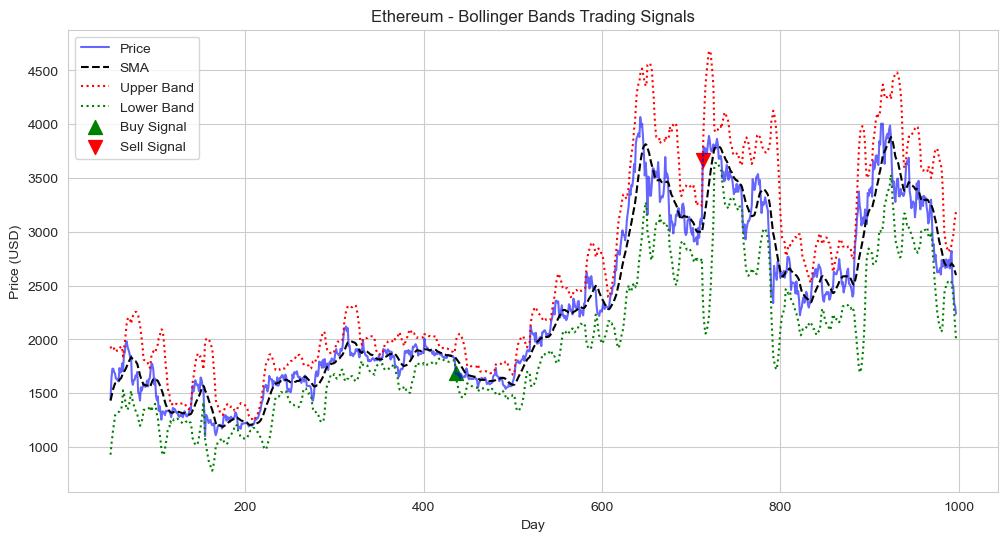

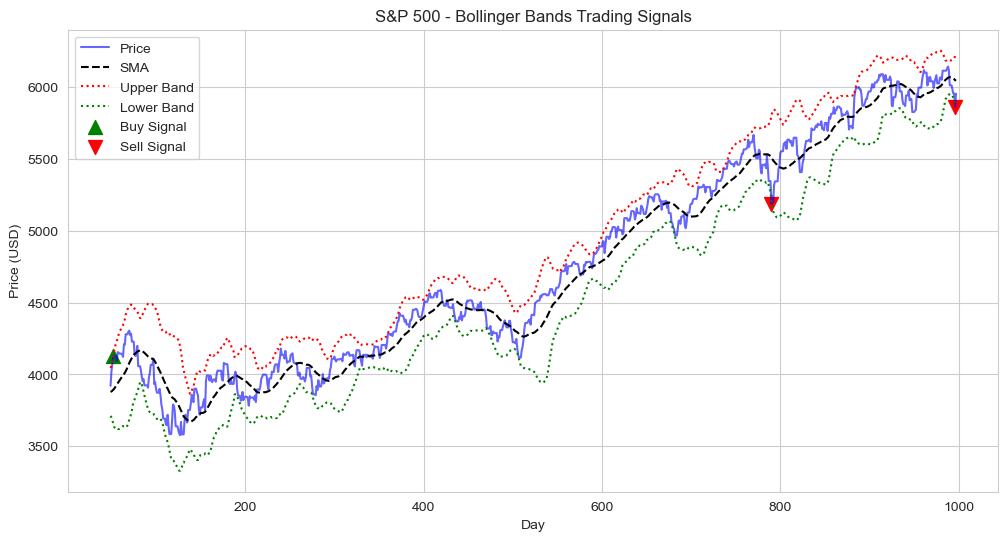

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_bollinger_bands(df, window, num_std):
    df = df.copy()
    df['SMA'] = df['price_usd'].rolling(window=window).mean()
    df['STD'] = df['price_usd'].rolling(window=window).std()
    df['Upper'] = df['SMA'] + (df['STD'] * num_std)
    df['Lower'] = df['SMA'] - (df['STD'] * num_std)
    return df.dropna()

def backtest_strategy(df, window, num_std, asset_type):
    df = calculate_bollinger_bands(df, window, num_std)

    # Adjust strategy based on asset type
    if asset_type == 'SPX':  # Trend-following for S&P 500
        df['Buy_Signal'] = df['price_usd'] > df['Upper']   # Buy breakouts
        df['Sell_Signal'] = df['price_usd'] < df['Lower']  # Sell dips

    elif asset_type == 'ETH':  # Mean-reversion for Ethereum
        df['Buy_Signal'] = df['price_usd'] < df['Lower']   # Buy dips
        df['Sell_Signal'] = df['price_usd'] > df['Upper']  # Sell breakouts

    # Backtesting
    returns = []
    holding = False
    buy_price = None

    for i in range(len(df)):
        if not holding and df['Buy_Signal'].iloc[i]:  # Enter trade
            buy_price = df['price_usd'].iloc[i]
            holding = True

        elif holding and df['Sell_Signal'].iloc[i]:  # Exit trade
            sell_price = df['price_usd'].iloc[i]
            roi = (sell_price - buy_price) / buy_price
            returns.append(roi)
            holding = False  # Reset for next trade

    if holding and buy_price is not None:  # Close any open position at last price
        sell_price = df['price_usd'].iloc[-1]
        roi = (sell_price - buy_price) / buy_price
        returns.append(roi)

    return df, round(np.mean(returns) * 100, 2) if returns else 0  # Return DataFrame + ROI

def plot_trades(df, asset_type):
    plt.figure(figsize=(12, 6))

    # Plot Price & Bollinger Bands
    plt.plot(df.index, df['price_usd'], label='Price', color='blue', alpha=0.6)
    plt.plot(df.index, df['SMA'], label='SMA', color='black', linestyle='dashed')
    plt.plot(df.index, df['Upper'], label='Upper Band', color='red', linestyle='dotted')
    plt.plot(df.index, df['Lower'], label='Lower Band', color='green', linestyle='dotted')

    # Plot Buy & Sell Signals
    plt.scatter(df.index[df['Buy_Signal']], df['price_usd'][df['Buy_Signal']], label='Buy Signal', color='green', marker='^', s=100)
    plt.scatter(df.index[df['Sell_Signal']], df['price_usd'][df['Sell_Signal']], label='Sell Signal', color='red', marker='v', s=100)

    # Titles & Legend
    plt.title(f"{asset_type} - Bollinger Bands Trading Signals")
    plt.xlabel("Day")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Backtest & Plot Results
eth_df, eth_roi = backtest_strategy(ethereum, 14, 3.16, "ETH")
spx_df, spx_roi = backtest_strategy(spx, 33, 2.83, "SPX")

print(f"Ethereum ROI: {eth_roi}%")
print(f"S&P 500 ROI: {spx_roi}%")

plot_trades(eth_df, "Ethereum")
plot_trades(spx_df, "S&P 500")


### Visualizing the feature engineering

In [34]:
# Visualizaing the features
# Moving averages (SMA, EMA)
import matplotlib.pyplot as plt

def plot_moving_averages(df, name):
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['price_usd'], label=f"{name} Price", color='black')
    plt.plot(df['date'], df['SMA_50'], label="SMA 50", linestyle="dashed", color='blue')
    plt.plot(df['date'], df['EMA_50'], label="EMA 50", linestyle="dotted", color='red')

    plt.title(f"{name} Moving Averages")
    plt.legend()
    plt.show()

In [35]:
# Volatility
import matplotlib.pyplot as plt

def plot_bollinger_atr(df, name):
    # Bollinger Bands Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['price_usd'], label=f"{name} Price", color='black')
    plt.plot(df['date'], df['BB_Upper'], label="Bollinger Upper", linestyle="dashed", color='blue')
    plt.plot(df['date'], df['BB_Lower'], label="Bollinger Lower", linestyle="dashed", color='blue')
    plt.fill_between(df['date'], df['BB_Upper'], df['BB_Lower'], color='blue', alpha=0.1)
    plt.title(f"{name} Bollinger Bands")
    plt.legend()
    plt.show()

    # ATR Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['ATR_14'], label="ATR (14)", color='purple')
    plt.title(f"{name} Average True Range (ATR)")
    plt.legend()
    plt.show()

'''
Bollinger Bands:
    What it measures: Price volatility and possible trend reversals.
    Middle line: Moving average.
    Upper Band (blue dashed): +2 standard deviations from moving average.
    Lower Band (blue dashed): -2 standard deviations from moving average.

    If price touches the upper band → Overbought (possible reversal down).
    If price touches the lower band → Oversold (possible reversal up).
    Bands widening → Increased volatility.
    Bands narrowing → Market consolidation (low volatility)


ATR:
    What it measures: Volatility of the market.
    High ATR → High volatility (big price swings).
    Low ATR → Low volatility (stable price movements).
    Sharp spikes in ATR → Unusual market events.
'''


'\nBollinger Bands:\n    What it measures: Price volatility and possible trend reversals.\n    Middle line: Moving average.\n    Upper Band (blue dashed): +2 standard deviations from moving average.\n    Lower Band (blue dashed): -2 standard deviations from moving average.\n\n    If price touches the upper band → Overbought (possible reversal down).\n    If price touches the lower band → Oversold (possible reversal up).\n    Bands widening → Increased volatility.\n    Bands narrowing → Market consolidation (low volatility)\n\n\nATR:\n    What it measures: Volatility of the market.\n    High ATR → High volatility (big price swings).\n    Low ATR → Low volatility (stable price movements).\n    Sharp spikes in ATR → Unusual market events.\n'

In [36]:
# Momentum (RSI, MACD)
# RSI
import matplotlib.pyplot as plt

def plot_rsi_macd(df, name):
    # RSI Plot
    plt.figure(figsize=(12, 4))
    plt.plot(df['date'], df['RSI_14'], label="RSI 14", color='green')
    plt.axhline(70, linestyle="dashed", color='red', label='Overbought Level (70)')
    plt.axhline(30, linestyle="dashed", color='blue', label='Oversold Level (30)')
    plt.title(f"{name} RSI Indicator")
    plt.legend()
    plt.show()

    # MACD Plot
    plt.figure(figsize=(12, 4))
    plt.plot(df['date'], df['MACD'], label="MACD", color='purple')
    plt.plot(df['date'], df['MACD_Signal'], label="MACD Signal", linestyle="dashed", color='orange')
    plt.title(f"{name} MACD")
    plt.legend()
    plt.show()

'''
RSI (Relative Strength Index) Chart
The RSI (Relative Strength Index) is a momentum indicator that measures the speed and magnitude of price movements.
    It oscillates between 0 and 100, where:
    Above 70 (red dashed line) → Overbought (price might decline).
    Below 30 (blue dashed line) → Oversold (price might rise).
Interpretation:
    When the RSI crosses above 70, it may indicate a potential reversal or pullback.
    When the RSI drops below 30, it suggests a potential buying opportunity.
    Frequent fluctuations indicate volatility.

MACD (Moving Average Convergence Divergence) Chart
    The MACD is a trend-following momentum indicator.
    MACD Line (Purple): Difference between the 12-day and 26-day Exponential Moving Averages (EMA).
    Signal Line (Orange Dashed): 9-day EMA of the MACD line.

    When MACD crosses above the Signal Line, it suggests a bullish signal (potential buy).
    When MACD crosses below the Signal Line, it suggests a bearish signal (potential sell).
    Strong divergence between the two lines indicates stronger trends.
'''

'\nRSI (Relative Strength Index) Chart\nThe RSI (Relative Strength Index) is a momentum indicator that measures the speed and magnitude of price movements.\n    It oscillates between 0 and 100, where:\n    Above 70 (red dashed line) → Overbought (price might decline).\n    Below 30 (blue dashed line) → Oversold (price might rise).\nInterpretation:\n    When the RSI crosses above 70, it may indicate a potential reversal or pullback.\n    When the RSI drops below 30, it suggests a potential buying opportunity.\n    Frequent fluctuations indicate volatility.\n\nMACD (Moving Average Convergence Divergence) Chart\n    The MACD is a trend-following momentum indicator.\n    MACD Line (Purple): Difference between the 12-day and 26-day Exponential Moving Averages (EMA).\n    Signal Line (Orange Dashed): 9-day EMA of the MACD line.\n\n    When MACD crosses above the Signal Line, it suggests a bullish signal (potential buy).\n    When MACD crosses below the Signal Line, it suggests a bearish sign

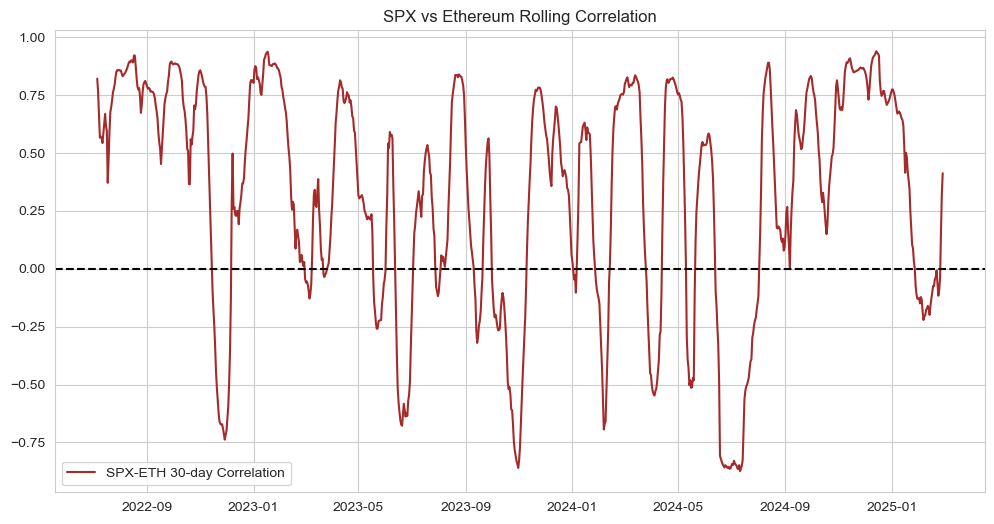

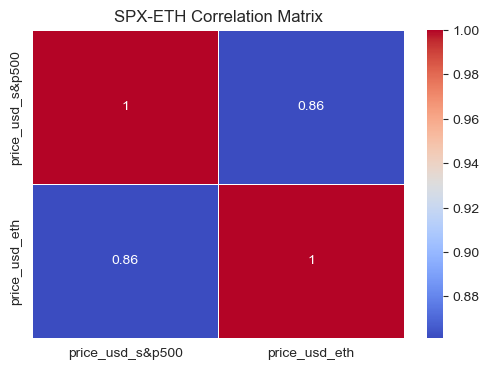

'\nIf ETH and SPX often move together, you might consider them as correlated assets in portfolio allocation.\nIf the correlation is high and increasing, a movement in SPX might signal a similar move in ETH.\nIf the correlation turns negative, diversifying between the two could reduce risk.\nVolatile swings in correlation suggest external factors (e.g., macroeconomic news, Fed policies, crypto-specific events).\n\nHigh correlation (~0.75 to 1.0) → ETH and SPX are closely following the same trend.\nLow correlation (~ -0.75 to -1.0) → When SPX goes up, ETH tends to go down (inverse relationship).\nNear 0 correlation → No consistent relationship.\n'

In [37]:
# Cross-asset correlation (SPX vs Ethereum)
import seaborn as sns
import pandas as pd

# Compute rolling correlation
rolling_corr = spx['price_usd'].rolling(30).corr(ethereum['price_usd'])

plt.figure(figsize=(12, 6))
plt.plot(spx['date'], rolling_corr, label="SPX-ETH 30-day Correlation", color='brown')
plt.axhline(0, linestyle="dashed", color='black')

plt.title("SPX vs Ethereum Rolling Correlation")
plt.legend()
plt.show()

# Heatmap of correlation between features
correlation_matrix = pd.concat([spx['price_usd'].rename("price_usd_s&p500"), ethereum['price_usd'].rename("price_usd_eth")], axis=1).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("SPX-ETH Correlation Matrix")
plt.show()

'''
If ETH and SPX often move together, you might consider them as correlated assets in portfolio allocation.
If the correlation is high and increasing, a movement in SPX might signal a similar move in ETH.
If the correlation turns negative, diversifying between the two could reduce risk.
Volatile swings in correlation suggest external factors (e.g., macroeconomic news, Fed policies, crypto-specific events).

High correlation (~0.75 to 1.0) → ETH and SPX are closely following the same trend.
Low correlation (~ -0.75 to -1.0) → When SPX goes up, ETH tends to go down (inverse relationship).
Near 0 correlation → No consistent relationship.
'''


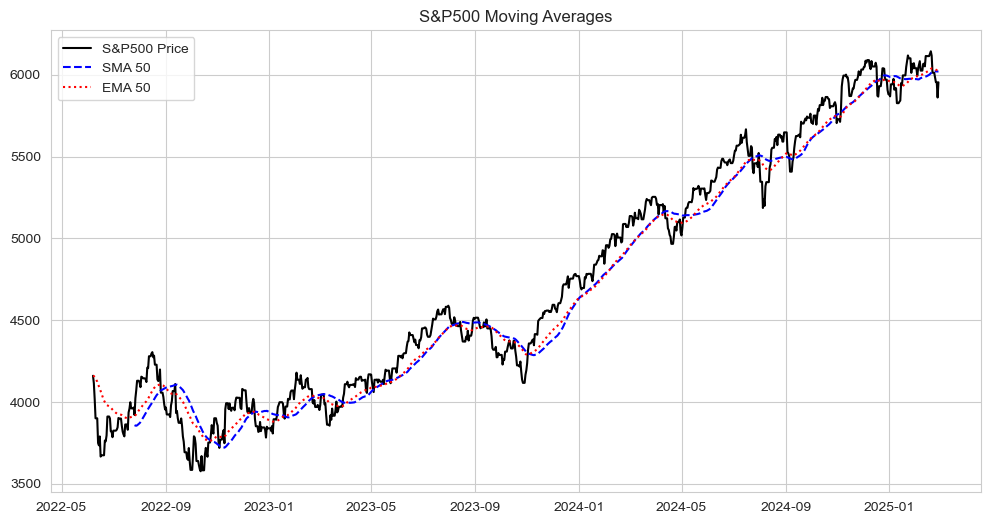

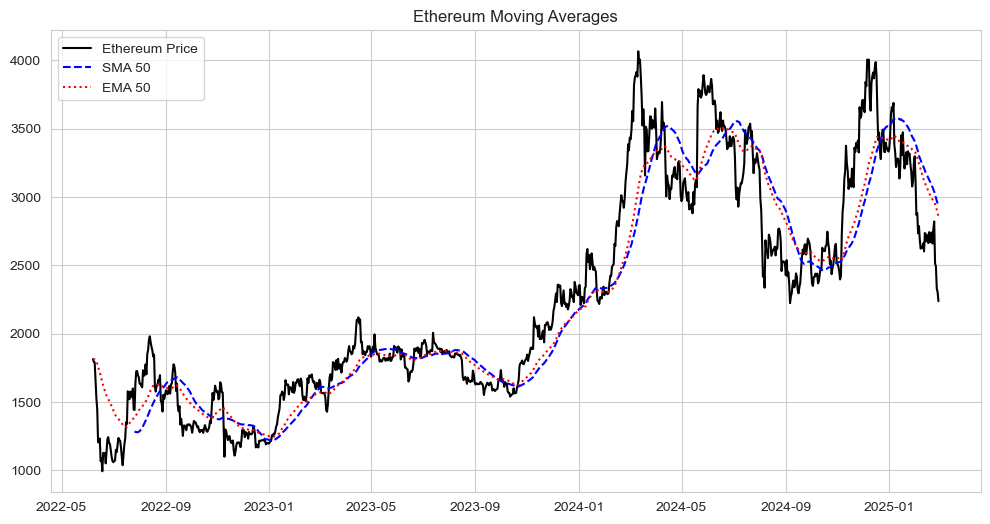

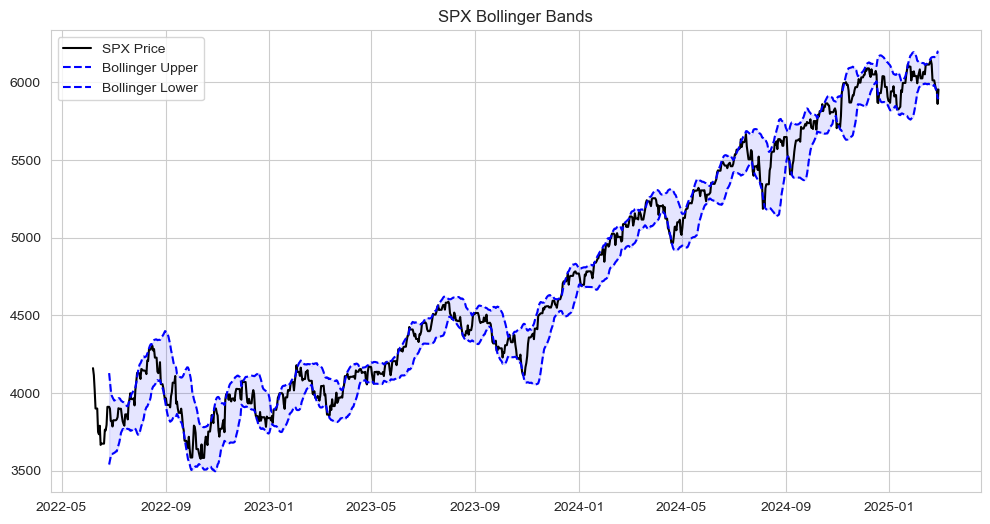

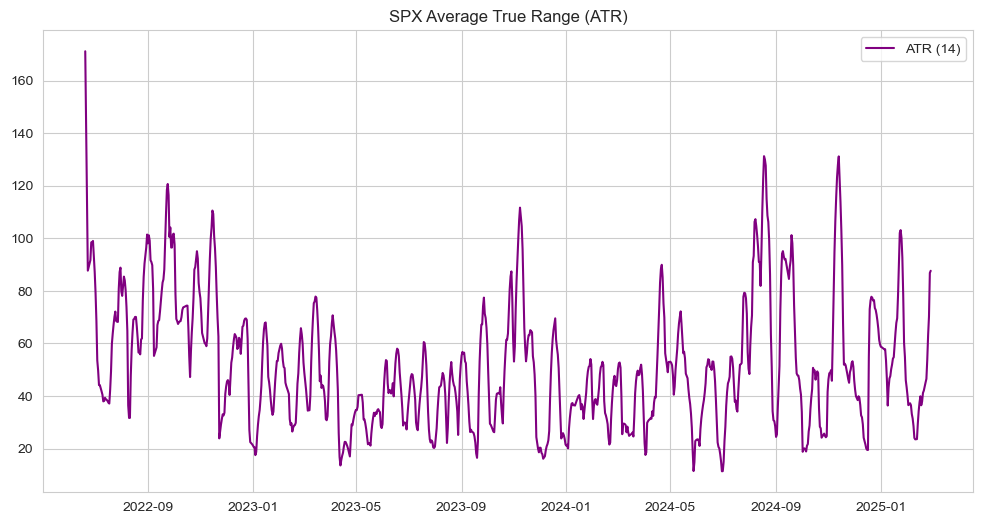

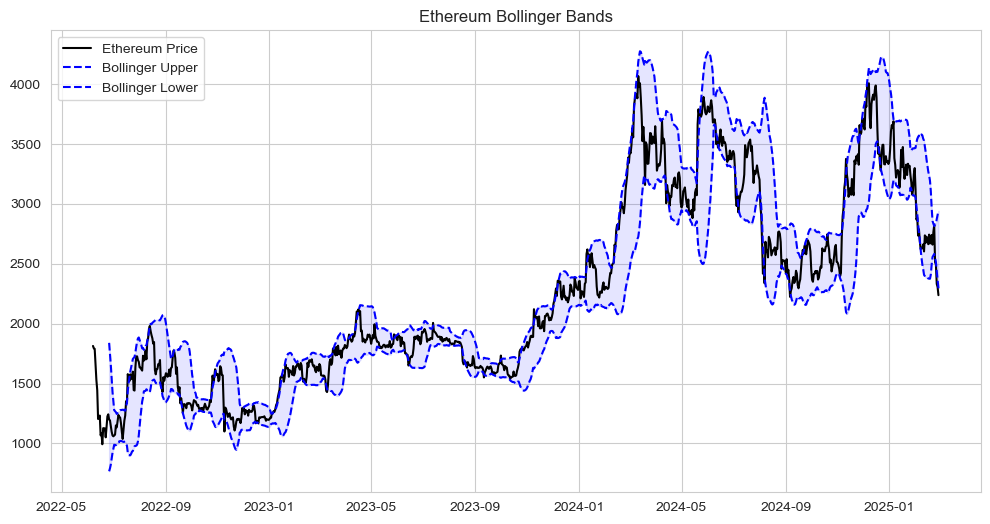

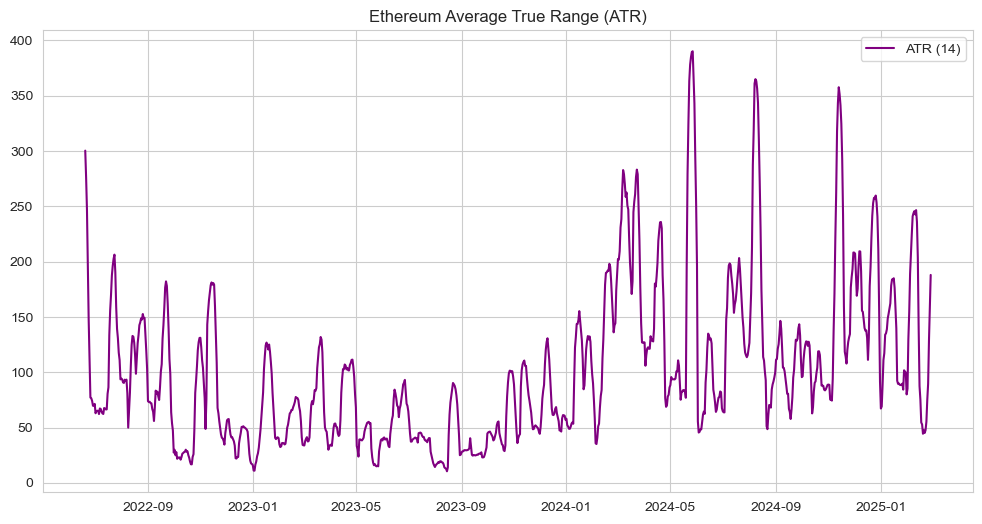

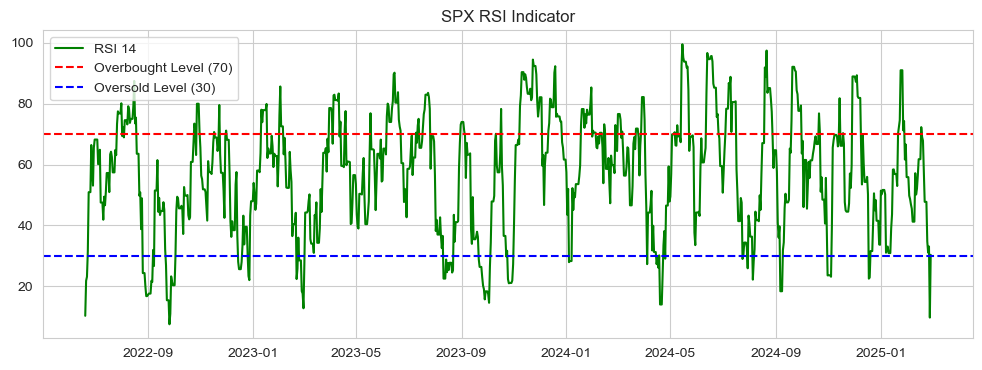

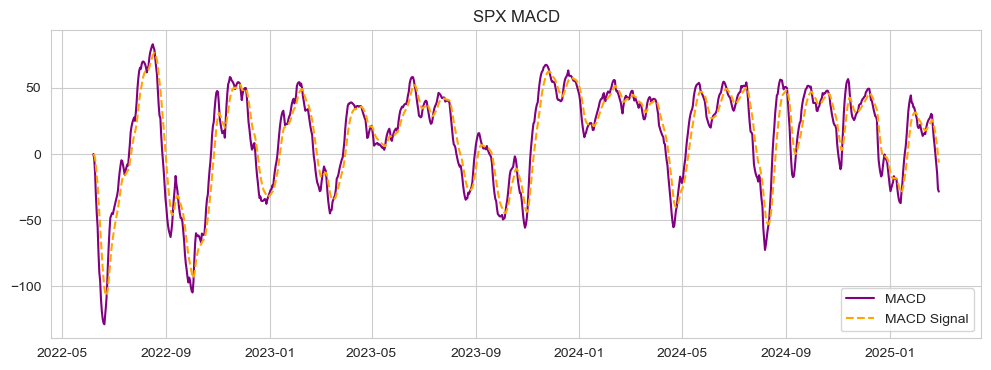

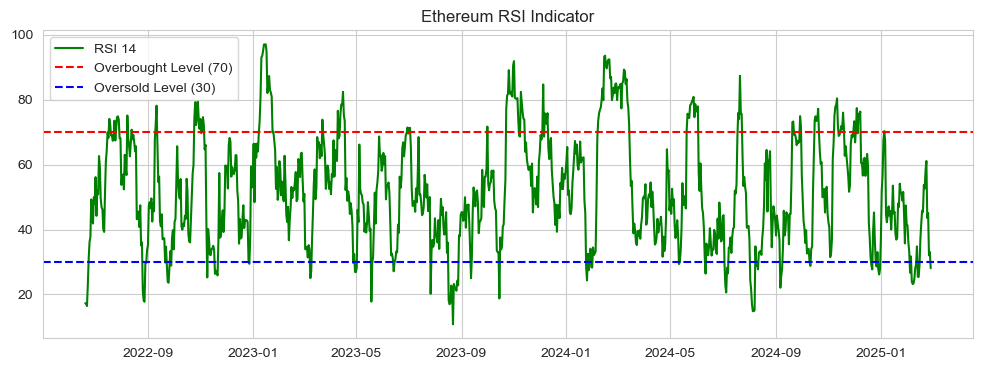

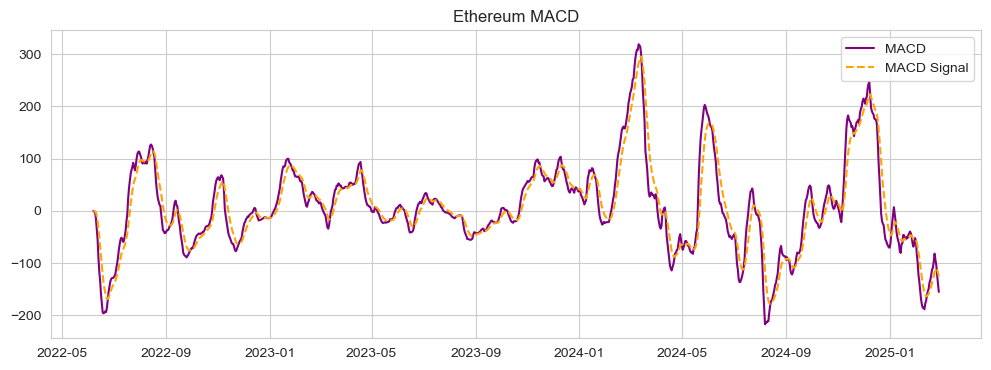

In [38]:
# Moving Averages
plot_moving_averages(spx, "S&P500")
plot_moving_averages(ethereum, "Ethereum")

# ATR Bollinger
plot_bollinger_atr(spx, "SPX")
plot_bollinger_atr(ethereum, "Ethereum")

# RSI & Macd
plot_rsi_macd(spx, "SPX")
plot_rsi_macd(ethereum, "Ethereum")
